## Network Analysis

Install required packages

In [36]:
# System tools
import os

# Data analysis
import pandas as pd
from collections import Counter
from itertools import combinations 
from tqdm import tqdm
import argparse

# NLP
import spacy
nlp = spacy.load("en_core_web_sm")

# drawing
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

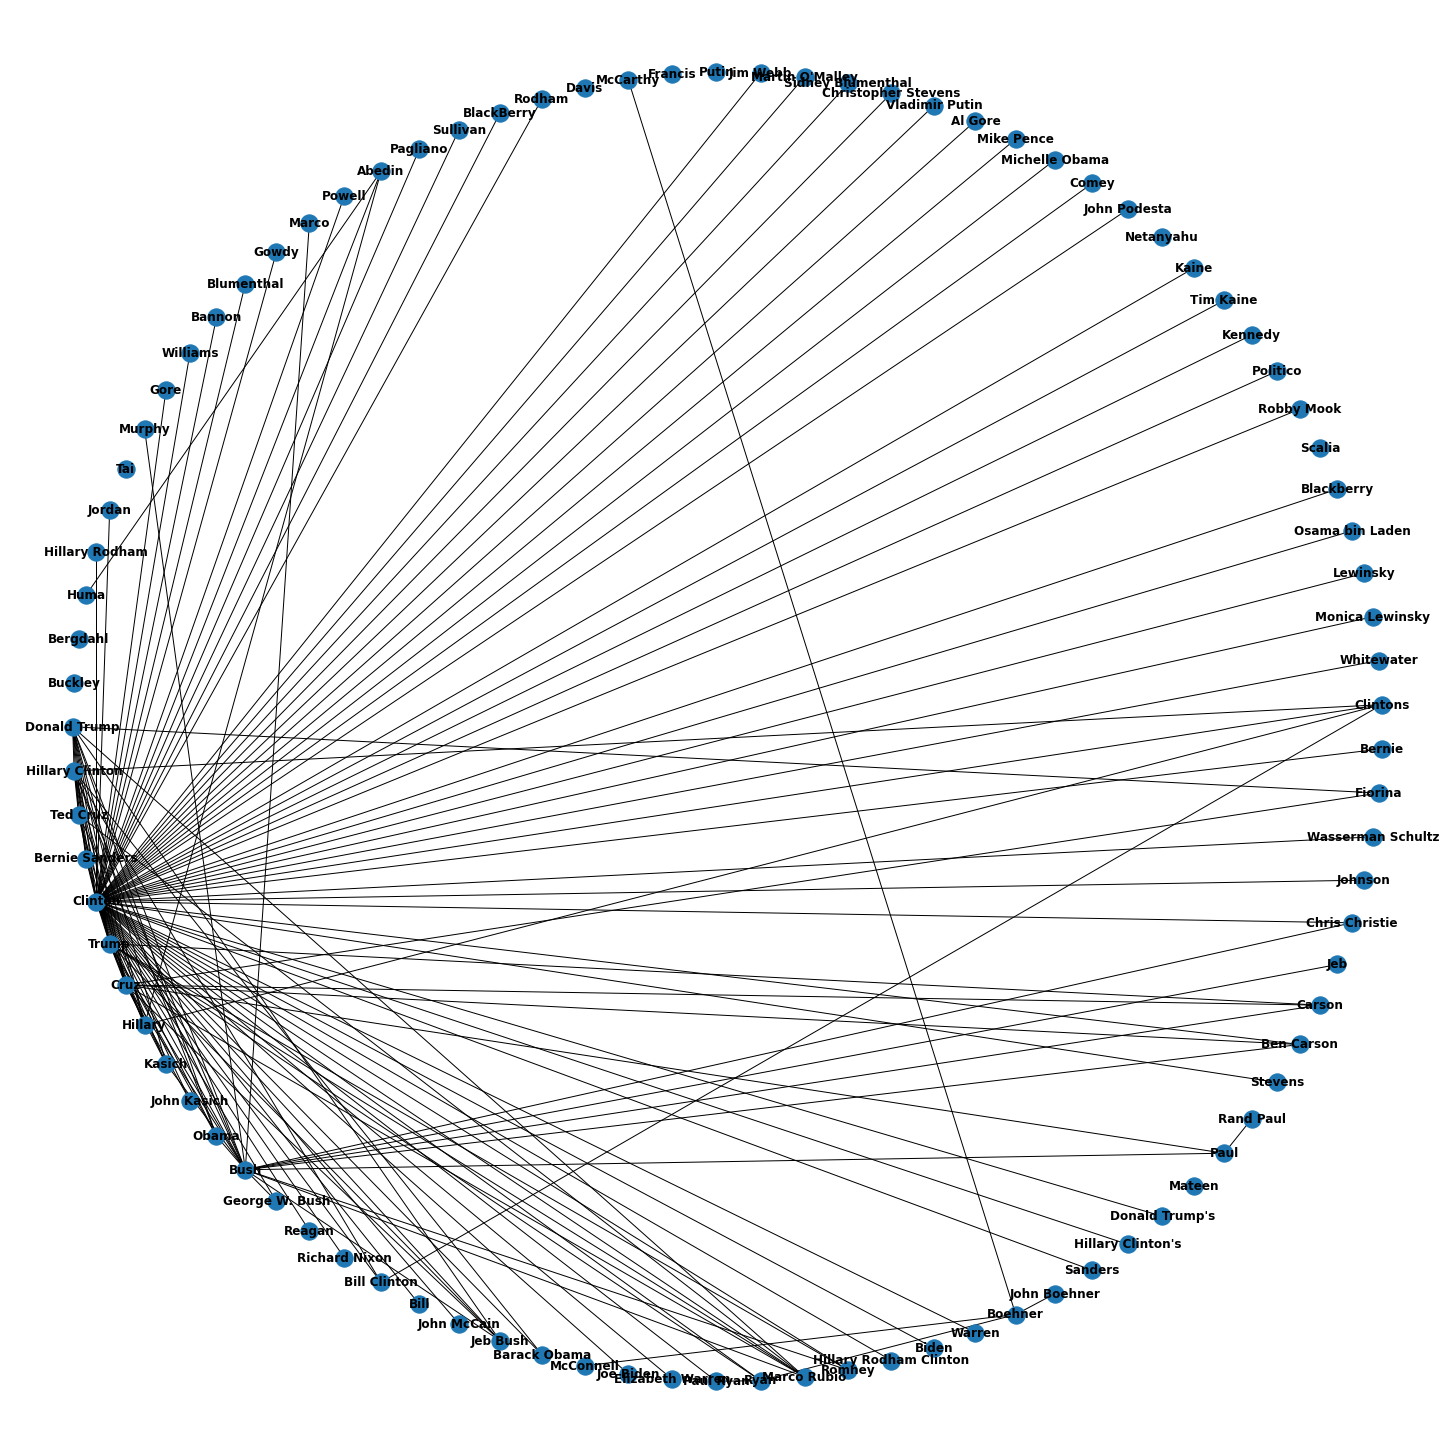

In [37]:

# Import the file specified in the commandline as a pd.
filepath = os.path.join("data","edgelist_weighted.csv")
data = pd.read_csv(filepath)
    
# Filter based on the weight of the edges
filtered = data[data["weight"] > 500]
    

# Create network
G = nx.from_pandas_edgelist(filtered, 'nodeA', 'nodeB', ["weight"])
nx.draw_shell(G, with_labels = True, font_weight= 'bold')

  
plt.show()

In [40]:
print(len(filtered.index))

169


In [6]:
ev = nx.eigenvector_centrality(G)

In [57]:
eigenvector = pd.DataFrame(ev.items())#.sort_values("weight", ascending=False)
eigenvector.columns =['Name', 'eigenvector']
eigenvector[:10]

,Name,eigenvector
0,Donald Trump,0.262974
1,Hillary Clinton,0.239332
2,Ted Cruz,0.178973
3,Bernie Sanders,0.117303
4,Clinton,0.539641
5,Trump,0.282742
6,Cruz,0.252294
7,Hillary,0.144665
8,Kasich,0.157613
9,John Kasich,0.070127


In [68]:
bc = nx.betweenness_centrality(G)
betweenness = pd.DataFrame(bc.items())#.sort_values("weight", ascending=False)
betweenness.columns =['Name', 'betweenness']
betweenness[:10]

,Name,betweenness
0,Donald Trump,0.011801
1,Hillary Clinton,0.006564
2,Ted Cruz,0.000040
3,Bernie Sanders,0.000000
4,Clinton,0.732612
5,Trump,0.020878
6,Cruz,0.034759
7,Hillary,0.001475
8,Kasich,0.000000
9,John Kasich,0.000000


In [50]:
dg = nx.degree(G)
degree = pd.DataFrame(dg)
degree.columns =['Name', 'degree']
degree[:10]

,Name,degree
0,Donald Trump,15
1,Hillary Clinton,14
2,Ted Cruz,7
3,Bernie Sanders,4
4,Clinton,73
5,Trump,17
6,Cruz,16
7,Hillary,8
8,Kasich,7
9,John Kasich,2


In [62]:
network_info = pd.merge(betweenness, degree, on='Name')
network_info = pd.merge(network_info, eigenvector, on='Name')
network_info[:10]

,Name,betweenness,degree,eigenvector
0,Donald Trump,0.011801,15,0.262974
1,Hillary Clinton,0.006564,14,0.239332
2,Ted Cruz,0.000040,7,0.178973
3,Bernie Sanders,0.000000,4,0.117303
4,Clinton,0.732612,73,0.539641
5,Trump,0.020878,17,0.282742
6,Cruz,0.034759,16,0.252294
7,Hillary,0.001475,8,0.144665
8,Kasich,0.000000,7,0.157613
9,John Kasich,0.000000,2,0.070127


In [64]:
network_info = eigenvector.merge(betweenness,on='Name').merge(degree,on='Name')
network_info[:10]

,Name,eigenvector,betweenness,degree
0,Donald Trump,0.262974,0.011801,15
1,Hillary Clinton,0.239332,0.006564,14
2,Ted Cruz,0.178973,0.000040,7
3,Bernie Sanders,0.117303,0.000000,4
4,Clinton,0.539641,0.732612,73
5,Trump,0.282742,0.020878,17
6,Cruz,0.252294,0.034759,16
7,Hillary,0.144665,0.001475,8
8,Kasich,0.157613,0.000000,7
9,John Kasich,0.070127,0.000000,2


In [66]:
network_info.to_csv("output/network_info.csv",index=False)